In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import cauchy

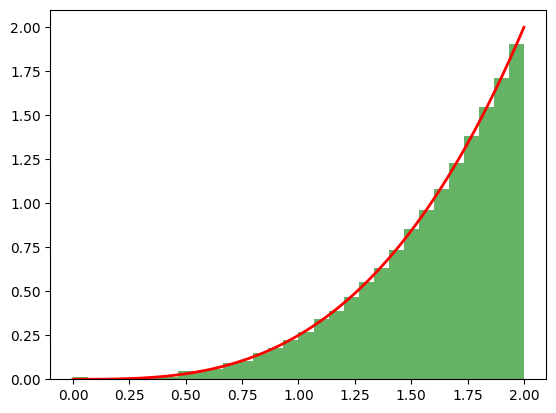

In [2]:
# q1
n_samples = 1_000

inv_cdf = lambda u: (16 * u)**(0.25)
u_values = np.linspace(0, 1, n_samples)

# empirical density
samples = inv_cdf(u_values)
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# true density
pdf = lambda x: x**3 / 4
x_values = np.linspace(0, 2, 200)
y_values = pdf(x_values)

plt.plot(x_values, y_values, 'r-', lw=2)

plt.show()

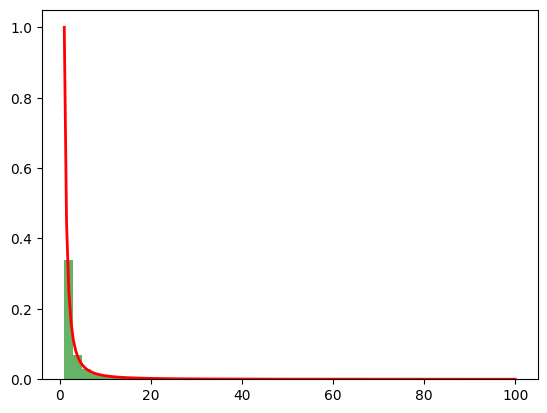

In [3]:
# q2
n_samples = 10_000

pdf = lambda x: x**(-2) # on [1, inf)
inv_cdf = lambda u: 1 / (1 - u)

u_values = np.linspace(0, 0.99, n_samples)  # avoid u=1
samples = inv_cdf(u_values)

plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')

x_values = np.linspace(1, 100, 200)
y_values = pdf(x_values)
plt.plot(x_values, y_values, 'r-', lw=2)

plt.show()


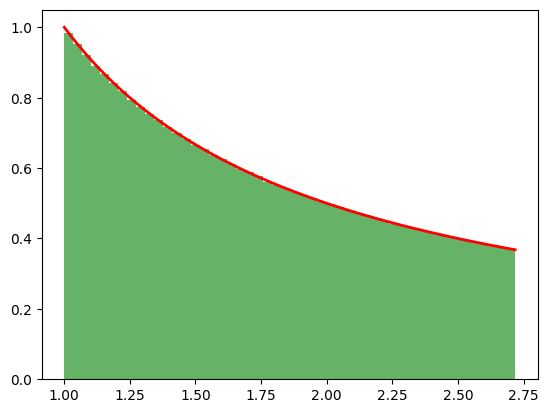

In [4]:
# q4

# x = exp(u), with u ~ unif(0, 1)
# the density generated by this transform is:
# f(x) = 1 / x for x in [1, e]

u_values = np.linspace(0, 1, n_samples)
samples = np.exp(u_values)
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')

x_values = np.linspace(1, np.e, 200)
y_values = 1 / x_values
plt.plot(x_values, y_values, 'r-', lw=2)

plt.show()

In [5]:
# q5
n_samples = 10_000
pdf_kernel = lambda x, y: x + y

# 0 <= x, y <= 1
x_values = np.random.uniform(0, 1, n_samples)
y_values = np.random.uniform(0, 1, n_samples)

max_density = pdf_kernel(1, 1)

z_values = np.random.uniform(0, max_density, n_samples)

accept_mask = z_values <= pdf_kernel(x_values, y_values)
accepted_x = x_values[accept_mask]
accepted_y = y_values[accept_mask]

# estimate E[XY]
estimate = np.mean(accepted_x * accepted_y)
print(f"Estimated E[XY]: {estimate}")

Estimated E[XY]: 0.33675676888846706


Estimated P(X > 3): 0.10117298408787959
Standard deviation: 0.000100669788755755
Relative error: 0.0995%
Normalization constant: 1.9964132832834598


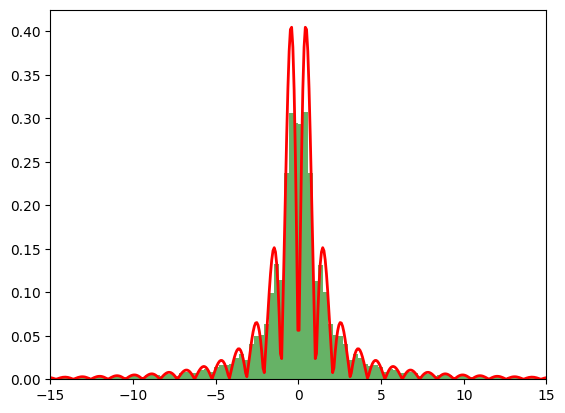

In [12]:
# q6
n_samples = 10_000_000
target_density_kernel = lambda x: np.abs(np.sin(3 * x)) / (1 + x**2) # on [-oo, oo]

# use cauchy as proposal and do rejection method
x_values = cauchy.rvs(size=n_samples)
proposal_density = cauchy.pdf(x_values)
u_values = proposal_density * np.random.uniform(0, 1, n_samples)

accepted_x = x_values[u_values <= target_density_kernel(x_values)]

# estimate P(X > 3)
estimate = np.mean(accepted_x > 3)
std = np.std(accepted_x > 3) / np.sqrt(len(accepted_x))
print(f"Estimated P(X > 3): {estimate}")
print(f"Standard deviation: {std}")
print(f"Relative error: {std / estimate * 100:.4f}%")

normalization_constant = np.mean(target_density_kernel(x_values) / proposal_density)
print(f"Normalization constant: {normalization_constant}")

# plot histogram of accepted samples
boundary = 15
truncated_accepted_x = accepted_x[(accepted_x >= -boundary) & (accepted_x <= boundary)]
plt.hist(truncated_accepted_x, bins=100, density=True, alpha=0.6, color='g')
plt.xlim(-boundary, boundary)

x_plot = np.linspace(-boundary, boundary, 400)
y_plot = target_density_kernel(x_plot) / normalization_constant
plt.plot(x_plot, y_plot, 'r-', lw=2)
plt.show()

In [ ]:
# q7

# simulate from f(x, y) prop to 1 / (1 + x^2 + y^2) e^(-(x^2 + y^2)/2) using rejection

x_values = np.random.normal(0, 1, n_samples)
y_values = np.random.normal(0, 1, n_samples)

proposal_density = np.exp(-(x_values**2 + y_values**2) / 2) # dominates the target density
u_values = proposal_density * np.random.uniform(0, 1, n_samples)

target_density_kernel = lambda x, y: 1 / (1 + x**2 + y**2) * np.exp(-(x**2 + y**2) / 2)
accepted_mask = u_values <= target_density_kernel(x_values, y_values)
accepted_x = x_values[accepted_mask]
accepted_y = y_values[accepted_mask]

# probability that x^2 + y^2 > 1
estimate = np.mean(accepted_x**2 + accepted_y**2 > 1)
std = np.std(accepted_x**2 + accepted_y**2 > 1) / np.sqrt(len(accepted_x))
print(f"Estimated P(X^2 + Y^2 > 1): {estimate}")
print(f"Standard deviation: {std}")
print(f"Relative error: {std / estimate * 100:.4f}%")



Estimated P(X^2 + Y^2 > 1): 0.39199587364780153
Standard deviation: 0.0002272708236798141


In [ ]:
# q8

# simulate gaussian random variable conditioned on > 1 with rejection sampling
n_samples = 100_000
target_density_kernel = lambda x: np.exp(-0.5 * x**2)  # on [1, inf)

# Proposal: cauchy distribution
proposal_density = lambda x: 1 / (np.pi * (1 + x**2)) * 4  # scaled to dominate target on [1, inf)

x_values = cauchy.rvs(size=n_samples)  # generate from proposal
x_values = np.abs(x_values)  # take absolute value to get [0, inf)
x_values = x_values[x_values >= 1]  # truncate to [1, inf)
u_values = proposal_density(x_values) * np.random.uniform(0, 1, len(x_values))
accepted_x = x_values[u_values <= target_density_kernel(x_values)]

# estimate P(X > 2 | X > 1) where X ~ N(0, 1)
estimate = np.mean(accepted_x > 2)
std = np.std(accepted_x > 2) / np.sqrt(len(accepted_x))
print(f"Estimated P(X > 2 | X > 1): {estimate}")
print(f"Standard deviation: {std}")
print(f"Relative error: {std / estimate * 100:.4f}%")

Estimated P(X > 2 | X > 1): 0.1450187265917603
Standard deviation: 0.0024883076944974287
Relative error: 1.7159%


In [15]:
# q9
n_samples = 100_000
target_density_kernel = lambda x: np.exp(-0.5 * x**2)  # on [1, inf) u (-inf, -1]

# Proposal: cauchy distribution
proposal_density = lambda x: 1 / (np.pi * (1 + x**2)) * 4  # scaled to dominate target on [1, inf)

x_values = cauchy.rvs(size=n_samples)
x_values = x_values[np.abs(x_values) > 1]

u_values = proposal_density(x_values) * np.random.uniform(0, 1, len(x_values))

accepted_x = x_values[u_values <= target_density_kernel(x_values)]

# variance of the accepted samples
estimate = np.var(accepted_x)
std = np.std((accepted_x - np.mean(accepted_x))**2) / np.sqrt(len(accepted_x))
print(f"Estimated variance of X | |X| > 1: {estimate}")
print(f"Standard deviation: {std}")
print(f"Relative error: {std / estimate * 100:.4f}%")

Estimated variance of X | |X| > 1: 2.5283123540394983
Standard deviation: 0.011865188375989719
Relative error: 0.4693%


In [23]:
# q10

target_density_kernel = lambda x, y, z, w: np.exp((x + y + z + w)**2 / 2)  # on [0, 1]^4
proposal_density = 1  # uniform on [0, 1]^4

scale_factor = target_density_kernel(1, 1, 1, 1) # to ensure proposal dominates target


x = np.random.uniform(0, 1, n_samples)
y = np.random.uniform(0, 1, n_samples)
z = np.random.uniform(0, 1, n_samples)
w = np.random.uniform(0, 1, n_samples)

u_values = np.random.uniform(0, 1, n_samples) * scale_factor

accept_mask = u_values <= target_density_kernel(x, y, z, w)
accepted_x = x[accept_mask]
accepted_y = y[accept_mask]
accepted_z = z[accept_mask]
accepted_w = w[accept_mask]

# estimate E[X + Y + Z + W]
estimate = np.mean(accepted_x + accepted_y + accepted_z + accepted_w)
std = np.std(accepted_x + accepted_y + accepted_z + accepted_w) / np.sqrt(len(accepted_x))
print(f"Estimated E[X + Y + Z + W]: {estimate}")
print(f"Standard deviation: {std}")
print(f"Relative error: {std / estimate * 100:.4f}%")

Estimated E[X + Y + Z + W]: 2.798471937438004
Standard deviation: 0.019914490077949605
Relative error: 0.7116%


In [26]:
# q11

x_values = np.random.uniform(0, 1, n_samples)
y_values = np.exp(x_values**2)

I = np.mean(y_values)
std = np.std(y_values) / np.sqrt(n_samples)
print(f"Estimated integral: {I}")
print(f"Standard deviation: {std}")
print(f"Relative error: {std / I * 100:.4f}%")

Estimated integral: 1.4625592652326858
Standard deviation: 0.0014982789683356458
Relative error: 0.1024%


In [27]:
# q12
x = np.random.normal(0, 1, n_samples)
y = np.random.normal(0, 1, n_samples)

# condition on X + Y > 1
condition_mask = x + y > 1
conditioned_x = x[condition_mask]
conditioned_y = y[condition_mask]

# estimate Corr(X, Y | X + Y > 1)
corr_estimate = np.corrcoef(conditioned_x, conditioned_y)[0, 1]
print(f"Estimated Corr(X, Y | X + Y > 1): {corr_estimate}")

Estimated Corr(X, Y | X + Y > 1): -0.6188214267505876


In [ ]:
# q13
target_density_kernel = lambda x: x * np.exp(-x)  # on [0, inf) this is a gamma(2, 1) density

proposal_density_kernel = lambda x: 1 / (np.pi * (1 + x**2))  # Cauchy density
scale_factor = 5  # to ensure proposal dominates target

x_values = cauchy.rvs(size=n_samples)
x_values = np.abs(x_values)  # take absolute value to get [0, inf) and since its symmetric about 0
u_values = np.random.uniform(0, 1, n_samples) * scale_factor * proposal_density_kernel(x_values)

accepted_x = x_values[u_values <= target_density_kernel(x_values)]

# estimate median of X
estimate = np.median(accepted_x)
print(f"Estimated median of X: {estimate}")

Estimated median of X: 1.6813856305246753


In [ ]:
# q14
target_density_kernel = lambda x, y, z: (x + y + z)**2  # on [0, 1]^3
envelope = lambda x, y, z: 9  # since (x + y + z)^2 <= 9 on [0, 1]^3

x_values = np.random.uniform(0, 1, n_samples)
y_values = np.random.uniform(0, 1, n_samples)
z_values = np.random.uniform(0, 1, n_samples)
u_values = np.random.uniform(0, 9, n_samples)

accept_mask = u_values <= target_density_kernel(x_values, y_values, z_values)

# acceptance rate
acceptance_rate = np.mean(accept_mask)
print(f"Acceptance rate: {acceptance_rate}")

Acceptance rate: 0.27694


In [31]:
# q15 volume estimation
x_values = np.random.uniform(0, 1, n_samples)
y_values = np.random.uniform(0, 1, n_samples)
z_values = np.random.uniform(0, 1, n_samples)

V = np.mean(x_values**2 + y_values**2 + z_values**2 <= 1)
print(f"Estimated volume: {V}")


Estimated volume: 0.52521


In [34]:
# q16

inv_cdf = lambda x: np.sqrt(x) # for u in [0, 1]

x_values = np.random.uniform(0, 1, (n_samples, 5))
y_values = inv_cdf(x_values)

# estimate E[max(Y1, ..., Y5)]
estimate = np.mean(np.max(y_values, axis=1))
std = np.std(np.max(y_values, axis=1)) / np.sqrt(n_samples)
print(f"Estimated E[max(Y1, ..., Y5)]: {estimate}")
print(f"Standard deviation: {std}")
print(f"Relative error: {std / estimate * 100:.4f}%")


Estimated E[max(Y1, ..., Y5)]: 0.9088915939613295
Standard deviation: 0.00026381831268063423
Relative error: 0.0290%


In [37]:
# q17
x_values = np.random.uniform(0, 1, n_samples)
y_values = np.random.uniform(0, 1, n_samples)

accept_mask = x_values + y_values <= 1 # triangle uniform distribution
accepted_x = x_values[accept_mask]
accepted_y = y_values[accept_mask]

# estimate E[X  / (X + Y + 1)]
vales = accepted_x / (accepted_x + accepted_y + 1)
estimate = np.mean(vales)
std = np.std(vales) / np.sqrt(len(vales))
print(f"Estimated E[X / (X + Y + 1)]: {estimate}")
print(f"Standard deviation: {std}")
print(f"Relative error: {std / estimate * 100:.4f}%")


Estimated E[X / (X + Y + 1)]: 0.19346531564778152
Standard deviation: 0.0005608604195250995
Relative error: 0.2899%


In [40]:
# q18

target_density_kernel = lambda x: np.exp(-x**4)  # on [-inf, inf]

proposal_density_kernel = lambda x: np.exp(-x**2 / 2)
scale_factor = 1.5  # to ensure proposal dominates target

# estimate integral of e^(-x^4) from -inf to inf using rejection with normal proposal
x_values = np.random.normal(0, 1, n_samples)
u_values = np.random.uniform(0, 1, n_samples) * proposal_density_kernel(x_values) * scale_factor
accepted_x = x_values[u_values <= target_density_kernel(x_values)]

acceptance_rate = len(accepted_x) / n_samples

integral_estimate = acceptance_rate * np.sqrt(2 * np.pi) * scale_factor

ratio = integral_estimate / np.sqrt(2 * np.pi)

# print ratio
print(f"Estimated integral of e^(-x^4) from -inf to inf: {integral_estimate}")
print(f"Ratio to integral of standard normal density: {ratio}")

Estimated integral of e^(-x^4) from -inf to inf: 1.8130818304647223
Ratio to integral of standard normal density: 0.7233150000000002


In [41]:
# q19

target_density_kernel = lambda x, y: x + y
proposal_density_kernel = lambda x, y: 2  # since x, y in [0, 1], max of x + y is 2

x_values = np.random.uniform(0, 1, n_samples)
y_values = np.random.uniform(0, 1, n_samples)
u_values = np.random.uniform(0, 2, n_samples)

accept_mask = u_values <= target_density_kernel(x_values, y_values)
accepted_x = x_values[accept_mask]
accepted_y = y_values[accept_mask]

# estimate conditional expectation E[X | Y > 0.5]
condition_mask = accepted_y > 0.5
conditioned_x = accepted_x[condition_mask]

estimate = np.mean(conditioned_x)
std = np.std(conditioned_x) / np.sqrt(len(conditioned_x))
print(f"Estimated E[X | Y > 0.5]: {estimate}")
print(f"Standard deviation: {std}")
print(f"Relative error: {std / estimate * 100:.4f}%")


Estimated E[X | Y > 0.5]: 0.56584702480257
Standard deviation: 0.001578072906938433
Relative error: 0.2789%


Estimated E[X^2]: 1.4305678618694748
Standard deviation: 0.011771063437213208
Relative error: 0.8228%


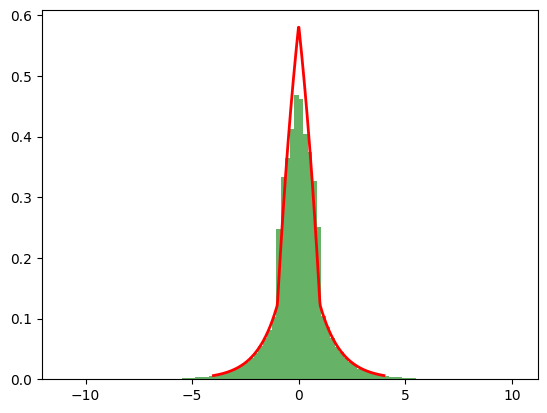

In [43]:
# q20 mixture density with composition method

alpha = 1/3
component1_density = lambda x: 0.75 * (1 - x**2) * (x >= -1) * (x <= 1)
component2_density = lambda x: 0.5 * np.exp(-np.abs(x))  # Laplace distribution

component1_samples = np.random.uniform(-1, 1, n_samples)
component2_samples = np.random.laplace(0, 1, n_samples)

# mixture sampling
u_values = np.random.uniform(0, 1, n_samples)
mixture_samples = np.where(u_values < alpha, component1_samples, component2_samples)

# estimate E[X^2]
estimate = np.mean(mixture_samples**2)
std = np.std(mixture_samples**2) / np.sqrt(n_samples)
print(f"Estimated E[X^2]: {estimate}")
print(f"Standard deviation: {std}")
print(f"Relative error: {std / estimate * 100:.4f}%")

# plot histogram of mixture samples
plt.hist(mixture_samples, bins=100, density=True, alpha=0.6, color='g')
x_plot = np.linspace(-4, 4, 400)
y_plot = alpha * component1_density(x_plot) + (1 - alpha) * component2_density(x_plot)
plt.plot(x_plot, y_plot, 'r-', lw=2)
plt.show()